In [87]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
path = 'D:/Dataset/titanic/'
train = pd.read_csv(path + 'train.csv').copy()
test = pd.read_csv(path + 'test.csv').copy()
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


passengerld = 승객 id  
survived = 살아남았는가  
Pclass = ticket class(좌석 등급)  
name = 이름  
sex = 성별  
age = 나이  
SibSp = 타이타닉호에 탑승한 형제/배우자 수  
Parch = 타이타닉호에 탑승한 부모/자녀 수  
Ticket = 티켓 번호  
Fare = 요금  
Cabin = 선실번호 / 케비넷 번호?  
Embarked = 승선항 C = 셰르부르, Q = 퀸스타운, S = 사우샘프턴

In [90]:
corr_matrix = train.corr()
corr_matrix['Age'].sort_values(ascending=False)

Age            1.000000
Fare           0.096067
PassengerId    0.036847
Survived      -0.077221
Parch         -0.189119
SibSp         -0.308247
Pclass        -0.369226
Name: Age, dtype: float64

In [91]:
# 수 확인
def val_count_df(df, column_name, sort_by_column_name=False):
    value_count = df[column_name].value_counts().reset_index().rename(columns={column_name:"Value Count","index":column_name}).set_index(column_name)
    value_count["Percentage"] = df[column_name].value_counts(normalize=True)*100
    value_count = value_count.reset_index()
    if sort_by_column_name:
        value_count = value_count.sort_values(column_name)
    return value_count

def plot_and_display_valuecounts(df, column_name, sort_by_column_name=False):
    val_count = val_count_df(df, column_name, sort_by_column_name)
    #display(val_count)
    val_count.set_index(column_name).plot.pie(y="Value Count", figsize=(5,5), legend=False, ylabel= column_name);

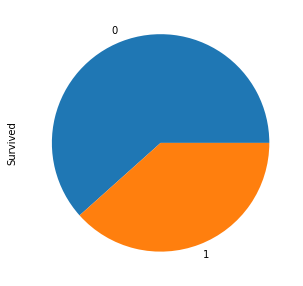

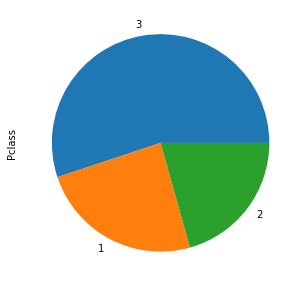

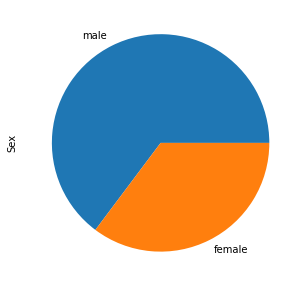

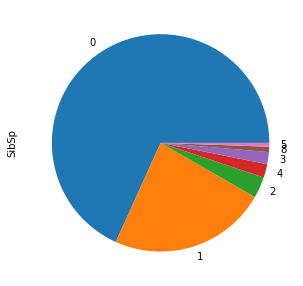

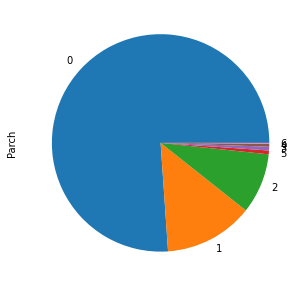

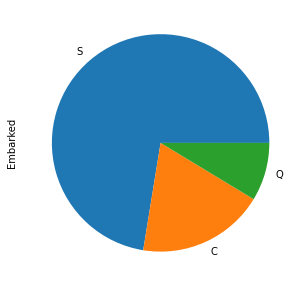

In [92]:
show_columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for i in range(0, len(show_columns)):
    plot_and_display_valuecounts(train, show_columns[i])

###### age, cabin, embarked 비어있는 부분 확인

In [93]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [95]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

Imputer = SimpleImputer(strategy='most_frequent')
train['Embarked'] = Imputer.fit_transform(train[['Embarked']])
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [96]:
train = pd.get_dummies(data = train, columns = ['Embarked'], prefix = 'Embarked')
train = pd.get_dummies(data = train, columns = ['Sex'])
train = train.drop(['Cabin', 'Ticket', 'Name'], axis = 1)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1,1,0
888,889,0,3,NaN,1,2,23.4500,0,0,1,1,0
889,890,1,1,26.0,0,0,30.0000,1,0,0,0,1


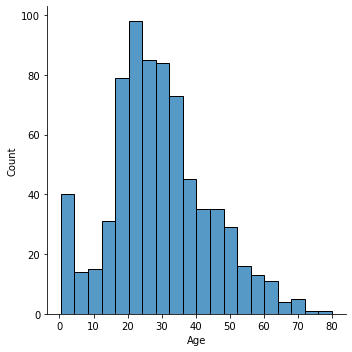

In [103]:
# f, axes = plt.subplots(figsize = (20, 10))
sns.displot(data = train, x = 'Age')

In [76]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_female       0
Sex_male         0
dtype: int64

In [7]:
# from sklearn.impute import SimpleImputer

# Imputer = SimpleImputer(strategy='most_frequent')
# drop_data['Embarked'] = Imputer.fit_transform(drop_data[['Embarked']])
# drop_data.info()

In [8]:
# drop_data = pd.get_dummies(data = drop_data, columns = ['Embarked'], prefix = 'Embarked')
# drop_data = pd.get_dummies(data = drop_data, columns = ['Sex'])
# drop_data

In [9]:
# test = pd.get_dummies(data = test, columns = ['Embarked'], prefix = 'Embarked')
# test = pd.get_dummies(data = test, columns = ['Sex'])

In [10]:
# check1 = drop_data['SibSp'].isin([0]) & drop_data['Parch'].isin([0])
# check2 = (drop_data.SibSp == 0) & (drop_data.Parch != 0)
# check3 = (drop_data.SibSp != 0) & (drop_data.Parch == 0)
# check4 = (drop_data.SibSp != 0) & (drop_data.Parch != 0)
# print(len(drop_data[check1]))
# print(len(drop_data[check2]))
# print(len(drop_data[check3]))
# print(len(drop_data[check4]))

In [11]:
# data1 = drop_data[check1]
# data2 = drop_data[check2]
# data3 = drop_data[check3]
# data4 = drop_data[check4]
# print(data1['Age'].mean())
# print(data2['Age'].mean())
# print(data3['Age'].mean())
# print(data4['Age'].mean())

In [12]:
# Imputer = SimpleImputer(strategy='median')

# data1['Age'] = Imputer.fit_transform(data1[['Age']])
# data2['Age'] = Imputer.fit_transform(data2[['Age']])
# data3['Age'] = Imputer.fit_transform(data3[['Age']])
# data4['Age'] = Imputer.fit_transform(data4[['Age']])

# drop_data = pd.concat([data1, data2, data3, data4])
# drop_data

In [13]:
def data_scan(data):
#     #Age -> 그룹을 나누어 비어있는 Age 채우기
#     check1 = data['SibSp'].isin([0]) & data['Parch'].isin([0])
#     check2 = (data.SibSp == 0) & (data.Parch != 0)
#     check3 = (data.SibSp != 0) & (data.Parch == 0)
#     check4 = (data.SibSp != 0) & (data.Parch != 0)
#     data1 = data[check1]['Age'].mean()
#     data2 = data[check2]['Age'].mean()
#     data3 = data[check3]['Age'].mean()
#     data4 = data[check4]['Age'].mean()
# #     print(data1, data2, data3, data4)

#     for i in range(0, len(data)):
#         if pd.isna(data['Age'][i]) == True:
#             if (data['SibSp'][i] == 0) & (data['Parch'][i] == 0):
#                 data['Age'][i] = data1
#             elif (data['SibSp'][i] == 0) & (data['Parch'][i] != 0):
#                 data['Age'][i] = data2
#             elif (data['SibSp'][i] != 0) & (data['Parch'][i] == 0):
#                 data['Age'][i] = data3
#             elif (data['SibSp'][i] != 0) & (data['Parch'][i] != 0):
#                 data['Age'][i] = data4
                
#     #비어있는 Embarked 채우기
#     from sklearn.impute import SimpleImputer
#     Impute_freq = SimpleImputer(strategy='most_frequent')
#     data['Embarked'] = Impute_freq.fit_transform(data[['Embarked']])
    
#     #OneHotEncoder
#     data = pd.get_dummies(data = data, columns = ['Embarked'], prefix = 'Embarked')
#     data = pd.get_dummies(data = data, columns = ['Sex'])
    
#     #스케일링
#     from sklearn.pipeline import Pipeline
#     from sklearn.preprocessing import StandardScaler
    
#     num_pipeline = Pipeline([
#         ('Imputer', SimpleImputer(strategy = 'median')),
#         ('std_scaler', StandardScaler())
#     ])
    
#     data = num_pipeline.fit_transform(data)

    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import LabelEncoder
    
    num_pipeline = Pipeline([
        ('Imputer', SimpleImputer(strategy='median'))
    ])
    
    data['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(data[['Embarked']])
    data['Sex'] = LabelEncoder().fit_transform(data[['Sex']])
    data['Embarked'] = LabelEncoder().fit_transform(data[['Embarked']])
    print(data)
    
    data = num_pipeline.fit_transform(data)
#     data['Pclass / age'] = data['Pclass'] / data['Age']
    data = StandardScaler().fit_transform(data)
        
    return data

In [14]:
# k = 0
# for i in range(0, len(drop_data)):
#     if pd.isna(drop_data['Age'][i]) == True:
#         k+=1
# print(k)

# check1 = drop_data['SibSp'].isin([0]) & drop_data['Parch'].isin([0])
# check2 = (drop_data.SibSp == 0) & (drop_data.Parch != 0)
# check3 = (drop_data.SibSp != 0) & (drop_data.Parch == 0)
# check4 = (drop_data.SibSp != 0) & (drop_data.Parch != 0)
# data1 = drop_data[check1]
# data2 = drop_data[check2]
# data3 = drop_data[check3]
# data4 = drop_data[check4]

# for i in range(0, len(drop_data)):
#     if pd.isna(drop_data['Age'][i]) == True:
#         if (drop_data['SibSp'][i] == 0) & (drop_data['Parch'][i] == 0):
#             drop_data['Age'][i] == data1['Age'].mean()
#         elif drop_data[i] == check2:
#             drop_data['Age'][i] == data2['Age'].mean()
#         elif drop_data[i] == check3:
#             drop_data['Age'][i] == data3['Age'].mean()
#         elif drop_data[i] == check4:
#             drop_data['Age'][i] == data4['Age'].mean()

In [15]:
dataset = drop_data.copy()
X_train = dataset.drop(['Survived'], axis = 1)
y_train = dataset['Survived']
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [16]:
X_train = data_scan(X_train)
test = data_scan(test)
X_train

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2         3    0  26.0      0      0   7.9250         2
3         1    0  35.0      1      0  53.1000         2
4         3    1  35.0      0      0   8.0500         2
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000         2
887       1    0  19.0      0      0  30.0000         2
888       3    0   NaN      1      2  23.4500         2
889       1    1  26.0      0      0  30.0000         0
890       3    1  32.0      0      0   7.7500         1

[891 rows x 7 columns]
     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    1  34.5      0      0    7.8292         1
1         3    0  47.0      1      0    7.0000         2
2         2    1  62.0      0      0    9.6875         1
3         3    1  27.0      0      0    8.6625         2
4         3    0  2

C:\Users\cym80\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cym80\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cym80\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cym80\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

array([[ 0.82737724,  0.73769513, -0.56573646, ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.66386103, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.25833709, ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 , ...,  2.00893337,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.25833709, ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.20276197, ..., -0.47367361,
        -0.49237783, -0.67817453]])

In [17]:
test

array([[ 0.87348191,  0.75592895,  0.38623105, ..., -0.4002477 ,
        -0.49741333, -0.47091535],
       [ 0.87348191, -1.32287566,  1.37137004, ..., -0.4002477 ,
        -0.51227801,  0.70076689],
       [-0.31581919,  0.75592895,  2.55353683, ..., -0.4002477 ,
        -0.46410047, -0.47091535],
       ...,
       [ 0.87348191,  0.75592895,  0.70147553, ..., -0.4002477 ,
        -0.50779638,  0.70076689],
       [ 0.87348191,  0.75592895, -0.20485235, ..., -0.4002477 ,
        -0.49345515,  0.70076689],
       [ 0.87348191,  0.75592895, -0.20485235, ...,  0.61989583,
        -0.23695704, -1.64259759]])

In [18]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [19]:
# import matplotlib as plt
# corr_matrix = X_train.corr()
# corr_matrix['Fare'].sort_values(ascending=False)

In [20]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import SGDClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import GradientBoostingClassifier

# RF_clf = RandomForestClassifier(random_state = 42)
# RF_clf.fit(X_train, y_train)
# RF_param_grid = {
#     'n_estimators' : [130, 140, 150, 160, 170],
#     'max_depth' : [12, 13, 14, 15, 16, 17, 18, 19, 20],
#     'min_samples_split' : [2, 3, 4, 5, 6, 7]
# }

# RF_search = GridSearchCV(RF_clf, param_grid = RF_param_grid, scoring = 'accuracy',
#                         cv = 5, verbose = 1)
# RF_search.fit(X_train, y_train)
# print(RF_search.best_params_)
# RF_clf = RandomForestClassifier(n_estimators=RF_search.best_params_['n_estimators'],
#                                 max_depth = RF_search.best_params_['max_depth'],
#                                 min_samples_split = RF_search.best_params_['min_samples_split'],
#                                 random_state = 42)
# RF_clf.fit(X_train, y_train)

# SGD_clf = SGDClassifier(random_state = 42)
# SGD_clf.fit(X_train, y_train)
# SGD_param_grid = {
#     'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron',
#               'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
#     'penalty' : ['l2', 'l1'],
#     'tol' : [1e-4, 3e-4, 5e-4, 7e-4, 1e-3, 2e-3, 3e-3, 4e-3, 5e-3,7e-3, 1e-2],
#     'alpha' : [1e-4, 3e-4, 5e-4, 7e-4, 1e-3, 2e-3, 3e-3, 4e-3, 5e-3,7e-3, 1e-2]
# }

# SGD_search = GridSearchCV(SGD_clf, param_grid = SGD_param_grid, scoring = 'accuracy',
#                         cv = 5, verbose = 1)
# SGD_search.fit(X_train, y_train)
# print(SGD_search.best_params_)
# SGD_clf = SGDClassifier(loss = SGD_search.best_params_['loss'],
#                         penalty = SGD_search.best_params_['penalty'],
#                         tol = SGD_search.best_params_['tol'],
#                         alpha = SGD_search.best_params_['alpha'],
#                         random_state = 42)
# SGD_clf.fit(X_train, y_train)

# gbrt_clf = GradientBoostingClassifier(random_state = 42)
# gbrt_clf.fit(X_train, y_train)
# gbrt_param_grid = {
#     'n_estimators' : [70, 80, 90, 100, 110, 120, 130, 140, 150, 160],
#     'max_depth' : [3, 4, 5, 6, 7, 8, 9],
#     'min_samples_split' : [2, 3, 4, 5]
# }

# gbrt_search = GridSearchCV(gbrt_clf, param_grid = gbrt_param_grid, scoring = 'accuracy',
#                         cv = 5, verbose = 1)
# gbrt_search.fit(X_train, y_train)
# print(gbrt_search.best_params_)
# gbrt_clf = GradientBoostingClassifier(n_estimators = gbrt_search.best_params_['n_estimators'],
#                                       max_depth = gbrt_search.best_params_['max_depth'],
#                                       min_samples_split = gbrt_search.best_params_['min_samples_split'],
#                                       random_state = 42)
# gbrt_clf.fit(X_train, y_train)

# vot_clf_soft = VotingClassifier(estimators = [('rf', RF_clf), ('SGD', SGD_clf), ('gbrt', gbrt_clf)],
#                           voting = 'soft')
# vot_clf_soft.fit(X_train, y_train)

# vot_clf_hard = VotingClassifier(estimators = [('rf', RF_clf), ('SGD', SGD_clf), ('gbrt', gbrt_clf)],
#                           voting = 'hard')
# vot_clf_hard.fit(X_train, y_train)

In [21]:
# cross_val_score(SGD_clf, X_train, y_train, cv = 10, scoring = 'accuracy').mean()

In [22]:
# cross_val_score(RF_clf, X_train, y_train, cv = 10, scoring = 'accuracy').mean()

In [23]:
# cross_val_score(gbrt_clf, X_train, y_train, cv = 10, scoring = 'accuracy').mean()

In [24]:
# cross_val_score(vot_clf_hard, X_train, y_train, cv = 10, scoring = 'accuracy').mean()

In [25]:
# cross_val_score(vot_clf_soft, X_train, y_train, cv = 10, scoring = 'accuracy').mean()

In [26]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train)
cat = CatBoostClassifier(random_state = 42, verbose = 0)
cat.fit(X_train, y_train)
vot = VotingClassifier(estimators=[('cat', cat), ('xgb', xgb), ('rf', rf)], voting = 'soft')
vot.fit(X_train, y_train)

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x000002CFE8086310>),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type...
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_bin=256, max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=6,
                                            max_leaves=0, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=42,
                                            reg_alpha=0, reg_lambda=1, ...)),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft')

In [27]:
cross_val_score(vot, X_train, y_train, cv = 10, scoring = 'accuracy').mean()

0.835043695380774

In [28]:
predictions = vot.predict(test)

In [29]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [30]:
output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions})
output.to_csv('vot_cat_xgb_rf.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
